In [566]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [567]:
k = 4

In [568]:
def original_data(filename):
    df = pd.read_csv(filename, sep=",", index_col=False)
    df.columns = ["X", "y"]
    data = np.array(df, dtype=float)
    return data[:,:1], data[:, -1], df

In [569]:
def load_data(df):
    cols = df.columns.values
    df.columns = cols
    data = np.array(df, dtype=float)
    normalize(data)
    return data[:,: d * 2 + 1], data[:, -1]

In [570]:
def plot_data(x, y):
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.plot(x[:,0], y, 'bo')
    plt.show()

In [571]:
def normalize(data):
    for i in range(0,data.shape[1]-1):
        mu.append(np.mean(data[:,i]))
        std.append(np.std(data[:, i]))
        data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))

In [572]:
def h(x,theta):
    return np.matmul(x, theta)

In [573]:
def cost_function(x, y, theta):
    val = h(x, theta)
    return (val - y).T@(val -y)/(2*y.shape[0])

In [574]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []

    for _ in range(num_epochs):
        h_x = h(x, theta)
    
        cost_ = (1/m)*(x.T@(h_x - y))
        theta = theta - (learning_rate) * cost_
        J_all.append(cost_function(x, y, theta))

    return theta, J_all

In [575]:
def plot_cost(J_all, num_epochs):
    plt.figure(figsize=(3,3))
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(num_epochs, J_all, 'm', linewidth = "5")
    plt.show()

In [576]:
def test(d, x, theta, mu, std):
    x1 = (x - mu[0]) / std[0]
    total = 0
    for i in range(1, d + 1 ):
        s = np.sin(k * i * x)
        c = np.cos(k * i * x)

        ms = (s - mu[i])/std[i]
        mc = (c - mu[i])/std[i]

        tsin = theta[2 * i] * ms
        tcos = theta[2 * i + 1] * mc
        total += tsin + tcos
        
    y_pred = theta[0] * 1 + theta[1] * x1 + total

    #print('Prediction ', y_pred)
    
    return y_pred

In [577]:
def error(x, y, d):
    y = np.reshape(y, (x.shape[0],1))
    x = np.hstack((np.ones((x.shape[0],1)), x))
    theta = np.zeros((x.shape[1], 1))

    learning_rate = 0.1
    num_epochs = 50
    theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
    J = cost_function(x, y, theta)
    #print("Cost: ", J)
    #print("Parameters: ", theta)

    #for testing and plotting cost 
    n_epochs = []
    jplot = []
    count = 0
    for i in J_all:
        jplot.append(i[0][0])
        n_epochs.append(count)
        count += 1
    jplot = np.array(jplot)
    n_epochs = np.array(n_epochs)
    plot_cost(jplot, n_epochs)
    print('mean len ', len(theta))
    y_pred = test(d, X_test, theta, mu, std)
    y_pred= y_pred.reshape(-1)
    
    MSE = np.square(np.subtract(y_test,y_pred)).mean() 
 
    RMSE = math.sqrt(MSE)
    print("Root Mean Square Error:\n")
    print(RMSE)

In [578]:
x, y, df = original_data('train.csv')

In [579]:
d  = 12

for i in range(1, d + 1):
    rsin = np.sin(4 * i * x)
    rcos = np.cos(4 * i * x)
    df['sin('+str(k*i)+'x)'] = rcos
    df['cos('+str(k*i)+'x)'] = rsin

df.head(1)

,X,y,sin(4x),cos(4x),sin(8x),cos(8x),sin(12x),cos(12x),sin(16x),cos(16x),...,sin(32x),cos(32x),sin(36x),cos(36x),sin(40x),cos(40x),sin(44x),cos(44x),sin(48x),cos(48x)
0,0.247,3.001413,0.550361,0.834927,-0.394206,0.919022,-0.984272,0.176661,-0.689203,-0.724568,...,-0.049998,0.998749,-0.861399,0.507928,-0.898163,-0.439662,-0.127229,-0.991873,0.75812,-0.652115


In [580]:
new_cols = [col for col in df.columns if col != 'y'] + ['y']
df = df[new_cols]
df.head(1)

,X,sin(4x),cos(4x),sin(8x),cos(8x),sin(12x),cos(12x),sin(16x),cos(16x),sin(20x),...,cos(32x),sin(36x),cos(36x),sin(40x),cos(40x),sin(44x),cos(44x),sin(48x),cos(48x),y
0,0.247,0.550361,0.834927,-0.394206,0.919022,-0.984272,0.176661,-0.689203,-0.724568,0.225651,...,0.998749,-0.861399,0.507928,-0.898163,-0.439662,-0.127229,-0.991873,0.75812,-0.652115,3.001413


In [581]:
X_test, y_test, df_test = original_data('test.csv')

# Using the entire dataset

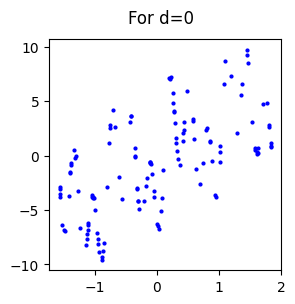

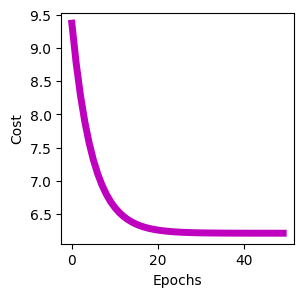

mean len  2
Root Mean Square Error:

2.958687151561711


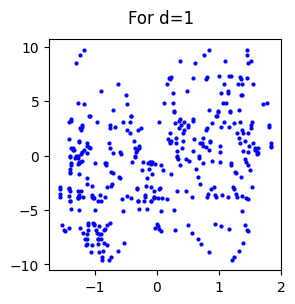

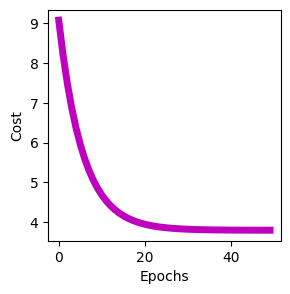

mean len  4
Root Mean Square Error:

4.32509761135403


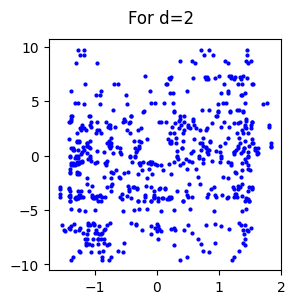

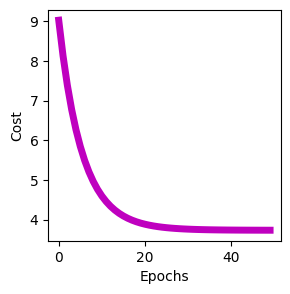

mean len  6
Root Mean Square Error:

4.274382540639051


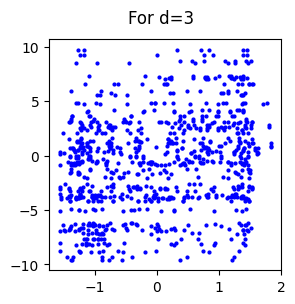

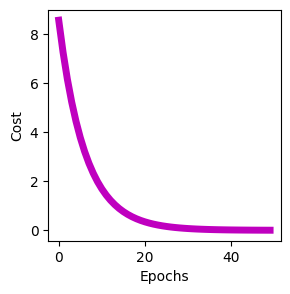

mean len  8
Root Mean Square Error:

4.373508124882891


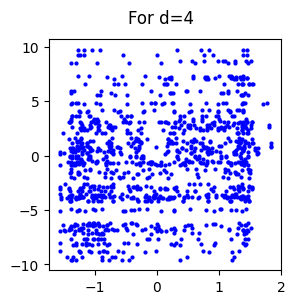

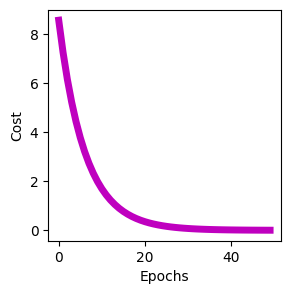

mean len  10
Root Mean Square Error:

4.374702883262567


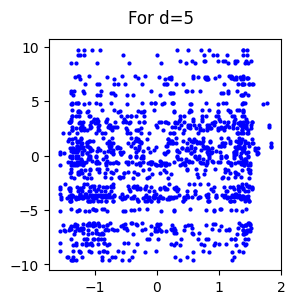

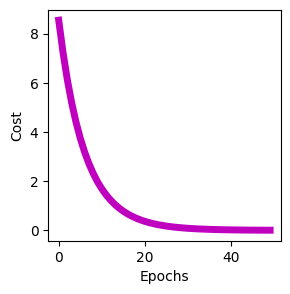

mean len  12
Root Mean Square Error:

4.37527219300033


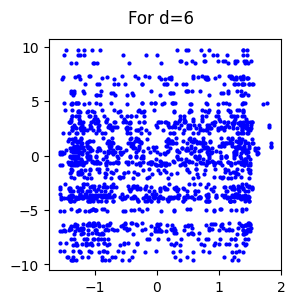

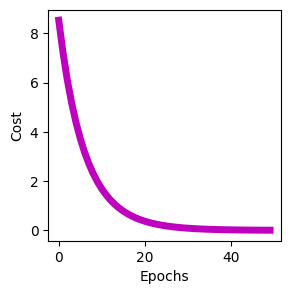

mean len  14
Root Mean Square Error:

4.3858262496354685


In [582]:
for i in range(0,7):
    mu = []
    std = []
    d = i
    x_, y_ = load_data(df)
    plt.figure(figsize=(3,3))
    plt.suptitle(f'For d={i}', fontsize = 12)
    plt.plot(x_,y_,'bo', markersize = 2)
    plt.show()
    error(x_, y_, i)

### <i>As evident from the root mean squared error from the above plots, the best predictions occur for the depth of d = 0, i.e., function  = Theta(0) + Theta(1)**x</i>

#### <i>We can also deduce that from depth d = 4 onwards there is negligible change in the root mean squared error which is increasing henceforth and hence we can interpret that for d = 4 and higher depths the polynomial functions starts overfitting*</i>

# Omitting last 20 rows

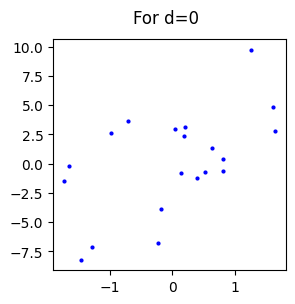

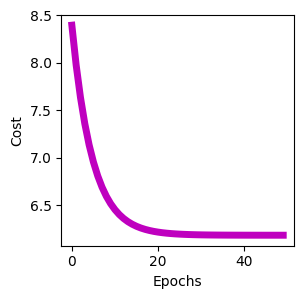

mean len  2
Root Mean Square Error:

3.0194586160034653


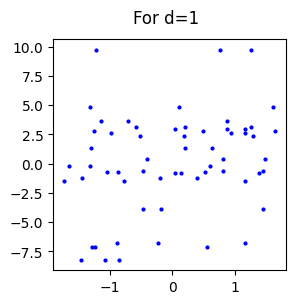

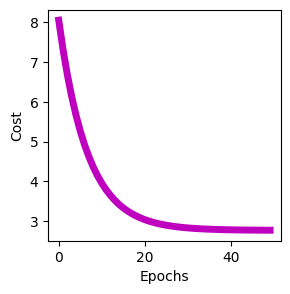

mean len  4
Root Mean Square Error:

4.881036820841051


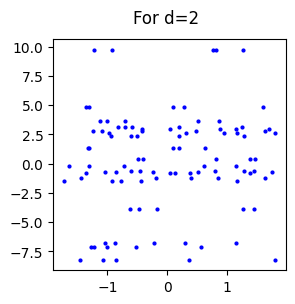

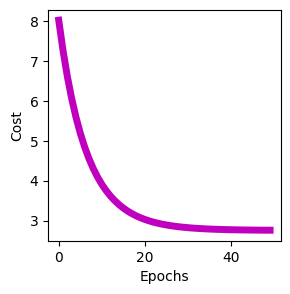

mean len  6
Root Mean Square Error:

4.8685235897906916


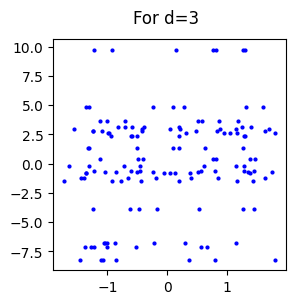

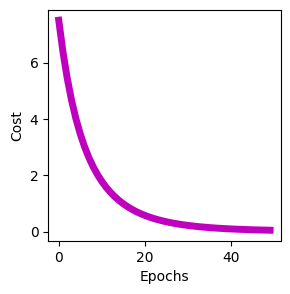

mean len  8
Root Mean Square Error:

4.847923282953027


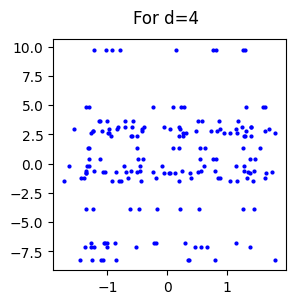

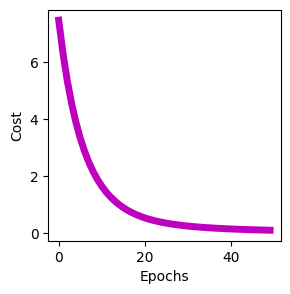

mean len  10
Root Mean Square Error:

5.062441557499668


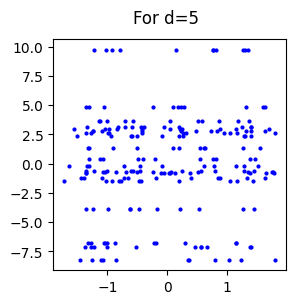

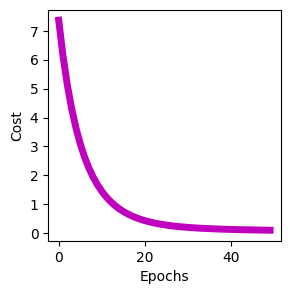

mean len  12
Root Mean Square Error:

5.322705560288219


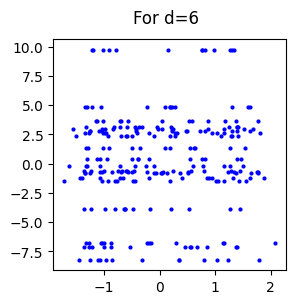

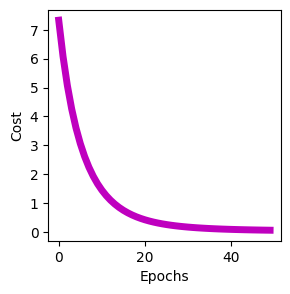

mean len  14
Root Mean Square Error:

5.523245159841004


In [583]:
for i in range(0,7):
    mu = []
    std = []
    d = i
    x_, y_ = load_data(df.iloc[:20,:])
    plt.figure(figsize=(3,3))
    plt.suptitle(f'For d={i}', fontsize = 12)
    plt.plot(x_,y_,'bo', markersize = 2)
    plt.show()
    error(x_, y_, i)

### <i>Here it can be inferred that the root mean squared error for the corresponding depths as compared to the entire dataset increases respectively</i>

#### <i>We can also see that the root mean squared dataset continues to drop as the model becomes more complex, but it only drops to depth d = 5 and then rises resulting in overfitting of the model</i>